In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Data Pre-processing

In [2]:
dataset = pd.read_csv("/home/med/Documents/url_class/iscxurl2016/All.csv")
dataset.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


<AxesSubplot:>

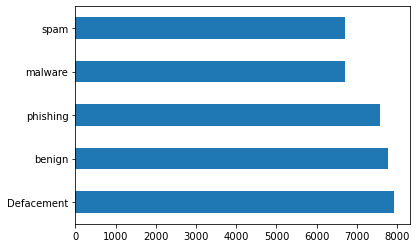

In [3]:
dataset['URL_Type_obf_Type'].value_counts().plot(kind = 'barh')

In [4]:
print(dataset.iloc[0])

Querylength                       0
domain_token_count                4
path_token_count                  5
avgdomaintokenlen               5.5
longdomaintokenlen               14
                            ...    
Entropy_DirectoryName      0.894886
Entropy_Filename           0.850608
Entropy_Extension               NaN
Entropy_Afterpath              -1.0
URL_Type_obf_Type        Defacement
Name: 0, Length: 80, dtype: object


In [5]:
lb = 'URL_Type_obf_Type'
print(dataset[lb].value_counts())

Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: URL_Type_obf_Type, dtype: int64


In [6]:
# Data cleansing (drop all rows containing NaN value)
dataset = dataset.dropna(axis=1)
dataset = dataset.replace(np.Infinity, np.nan).dropna(axis=0)
dataset.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,...,NumberRate_Domain,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,URL_Type_obf_Type
0,0,4,5,5.5,14,4,8,3,0,0,...,0.0,8,3,2,1,0,-1,0.726298,0.784493,Defacement
1,0,4,5,5.5,14,4,12,4,0,0,...,0.0,8,3,3,0,0,-1,0.688635,0.784493,Defacement
2,0,4,5,5.5,14,4,12,5,0,0,...,0.0,8,3,3,0,0,-1,0.695049,0.784493,Defacement
3,0,4,12,5.5,14,4,32,16,0,0,...,0.0,8,3,3,0,0,-1,0.640130,0.784493,Defacement
4,0,4,6,5.5,14,4,18,11,0,0,...,0.0,8,3,3,0,0,-1,0.681307,0.784493,Defacement


<AxesSubplot:>

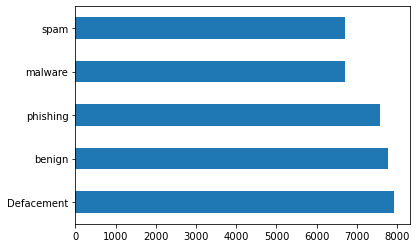

In [7]:
dataset['URL_Type_obf_Type'].value_counts().plot(kind = 'barh')

In [8]:
dataset.shape

(36697, 71)

In [9]:
#Normalize features and split labels column
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(dataset.loc[:, dataset.columns != lb]), columns=dataset.columns[:-1] )
labels = dataset[lb]

In [10]:
print(features.head())

   Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
0          0.0            0.117647          0.073529           0.142857   
1          0.0            0.117647          0.073529           0.142857   
2          0.0            0.117647          0.073529           0.142857   
3          0.0            0.117647          0.176471           0.142857   
4          0.0            0.117647          0.088235           0.142857   

   longdomaintokenlen       tld  charcompvowels  charcompace  ldl_url  \
0            0.196721  0.117647        0.041451     0.021127      0.0   
1            0.196721  0.117647        0.062176     0.028169      0.0   
2            0.196721  0.117647        0.062176     0.035211      0.0   
3            0.196721  0.117647        0.165803     0.112676      0.0   
4            0.196721  0.117647        0.093264     0.077465      0.0   

   ldl_domain  ...  NumberRate_URL  NumberRate_Domain  SymbolCount_URL  \
0         0.0  ...        0.022629  

In [11]:
print(labels.value_counts())

Defacement    7930
benign        7781
phishing      7577
malware       6711
spam          6698
Name: URL_Type_obf_Type, dtype: int64


## Chi-score of features 

In [12]:
chi_score = chi2(features, labels)
p_values = pd.Series(chi_score[1],index = features.columns)
p_values.sort_values(ascending = False , inplace = True)
#p_values.plot.bar()
print('Values in order of descending 64-values (higher=more significant)')
print(p_values.index[:64])

Values in order of descending 64-values (higher=more significant)
Index(['Entropy_URL', 'Path_LongestWordLength', 'isPortEighty', 'dld_domain',
       'ldl_domain', 'dld_filename', 'Filename_LetterCount',
       'File_name_DigitCount', 'sub-Directory_LongestWordLength',
       'ldl_filename', 'host_letter_count', 'path_token_count', 'domainlength',
       'this.fileExtLen', 'URL_sensitiveWord', 'Directory_DigitCount',
       'Entropy_Domain', 'avgdomaintokenlen', 'charcompvowels',
       'Domain_LongestWordLength', 'executable', 'longdomaintokenlen',
       'host_DigitCount', 'URL_Letter_Count', 'charcompace', 'urlLen',
       'pathurlRatio', 'pathDomainRatio', 'pathLength', 'subDirLen',
       'fileNameLen', 'delimeter_Domain', 'Directory_LetterCount',
       'CharacterContinuityRate', 'NumberRate_URL', 'spcharUrl',
       'delimeter_path', 'LongestPathTokenLength', 'NumberofDotsinURL',
       'Extension_LetterCount', 'SymbolCount_URL', 'SymbolCount_Directoryname',
       'tld', 'doma

## Dataset with 64th first rank features in chi-score

In [13]:
dataset_64 = dataset.copy()
dataset_64 = dataset_64[p_values.index[:64].insert(65, lb)]
dataset_64.head()

,Entropy_URL,Path_LongestWordLength,isPortEighty,dld_domain,ldl_domain,dld_filename,Filename_LetterCount,File_name_DigitCount,sub-Directory_LongestWordLength,ldl_filename,...,dld_path,LongestVariableValue,SymbolCount_FileName,Extension_DigitCount,Query_DigitCount,SymbolCount_Extension,SymbolCount_Afterpath,ldl_getArg,dld_getArg,URL_Type_obf_Type
0,0.726298,13,-1,0,0,0,13,0,5,0,...,0,-1,1,1,-1,0,-1,0,0,Defacement
1,0.688635,13,-1,0,0,0,13,0,5,0,...,0,-1,0,0,-1,0,-1,0,0,Defacement
2,0.695049,13,-1,0,0,0,13,0,5,0,...,0,-1,0,0,-1,0,-1,0,0,Defacement
3,0.640130,13,-1,0,0,0,13,0,13,0,...,0,-1,0,0,-1,0,-1,0,0,Defacement
4,0.681307,13,-1,0,0,0,13,0,13,0,...,0,-1,0,0,-1,0,-1,0,0,Defacement


## Creating features and labes

In [14]:
features_64 = dataset_64.loc[:, dataset_64.columns != lb].to_numpy()
print(features_64[0])

[ 7.26298195e-01  1.30000000e+01 -1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.30000000e+01  0.00000000e+00
  5.00000000e+00  0.00000000e+00  2.20000000e+01  5.00000000e+00
  2.50000000e+01  1.00000000e+00  0.00000000e+00  0.00000000e+00
  7.84493326e-01  5.50000000e+00  8.00000000e+00  1.40000000e+01
  0.00000000e+00  1.40000000e+01  0.00000000e+00  4.70000000e+01
  3.00000000e+00  5.80000000e+01  4.48275860e-01  1.04000000e+00
  2.60000000e+01  2.60000000e+01  1.30000000e+01  0.00000000e+00
  8.00000000e+00  6.00000000e-01  1.72413793e-02  3.00000000e+00
  2.00000000e+00  1.30000000e+01  5.00000000e+00  0.00000000e+00
  8.00000000e+00  2.00000000e+00  4.00000000e+00  4.00000000e+00
  3.00000000e+00  1.00000000e+00  4.31034480e-01 -1.00000000e+00
  8.00000000e-02  0.00000000e+00  2.00000000e+00 -1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.00000000e+00  1.00000000e+00  1.00000000e+00 -1.00000000e+00
  0.00000000e+00 -1.00000

## Encoding labels

In [15]:
coding_labels = {
    "benign" : 0,
    "Defacement" : 1,
    "malware" : 2,
    "phishing" : 3,
    "spam" : 4
}
labels_64 = dataset_64[lb].map(coding_labels).to_numpy()
print(labels_64)

[1 1 1 ... 4 4 4]


## Defining tets and visualisation plot Functions

In [16]:
def compareModels(accuracies, results, classifiers):
    comp = plt.figure(figsize=(10, 8))
    comp.suptitle('Comparison of models')
    x = comp.add_subplot(111)
    plt.boxplot(results)
    x.set_xticklabels(classifiers)
    plt.show()

In [17]:
def testModel(model, X_test, y_test):
    # make predictions on validation dataset
    predictions = model.predict(X_test)
    print("Accuracy = {:.2f}".format(accuracy_score(y_test, predictions)*100))
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test, predictions)
    sn.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Benign','Defacement','Malware','Phishing','Spam'],
           yticklabels=['Benign','Defacement','Malware','Phishing','Spam'])
    print('Classification Report:')
    print(classification_report(y_test, predictions))


In [18]:
def aucPlot(model, X_test, y_test, classifier):
    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs.reshape(lr_probs.shape[0], 5)
    print(lr_probs[0])
    #lr_probs = np.transpose([pred[:, 1] for pred in lr_probs])
    # calculate scores
    lr_auc = roc_auc_score(y_test, lr_probs, multi_class="ovr")
    # summarize scores
    print(classifier, ' : ROC AUC=%.2f %%' % (lr_auc*100))
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    labels = ['Benign', 'Defacement', 'Malware', 'Phishing', 'Spam']
    colors = ['blue', 'magenta', 'red', 'cyan', 'orange']
    
    n_classes = 5
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, lr_probs[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(15, 15))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], label=labels[i]+' ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-0.01, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Multi Class Classification')
        plt.legend(loc="lower right")    
    plt.show()

## Shuffeling and splitting data into train set and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features_64, labels_64, test_size=0.2, random_state=36)

# Building and training models

In [20]:
models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=10)))
models.append(('NaiveBayes', GaussianNB()))

# Evaluate each model in turn using 10-fold cross-validation

In [21]:
results = []
classifiers = []
accuracies = []

for classifier, model in models:
    kfold = StratifiedKFold(n_splits=10)
    start_time = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end_time = time.time() - start_time
    if end_time > 60:
        end_time = "%.2f (m)" % (end_time/60)
    else:
        end_time = "%.2f (s)" % (end_time)
    accuracies.append((cv_results.mean(), classifier))
    results.append(cv_results)
    classifiers.append(classifier)
    details = "%s: \t %f \t (%f)" % (classifier, cv_results.mean(), cv_results.std())
    print("{} \t | time : {}".format(details, end_time))

LogisticRegression: 	 0.811323 	 (0.005209) 	 | time : 11.42 (m)
KNN: 	 0.921552 	 (0.004611) 	 | time : 35.29 (s)
DecisionTreeClassifier: 	 0.951596 	 (0.002850) 	 | time : 7.76 (s)
SVM: 	 0.910379 	 (0.004680) 	 | time : 36.16 (m)
RandomForestClassifier: 	 0.970637 	 (0.003399) 	 | time : 6.74 (s)
NaiveBayes: 	 0.592159 	 (0.005162) 	 | time : 0.73 (s)


In [23]:
accuracies.sort(reverse=True)
for a, c in accuracies:
    print("{} \t {:.2f} %".format(c, a*100))

RandomForestClassifier 	 97.06 %
DecisionTreeClassifier 	 95.16 %
KNN 	 92.16 %
SVM 	 91.04 %
LogisticRegression 	 81.13 %
NaiveBayes 	 59.22 %


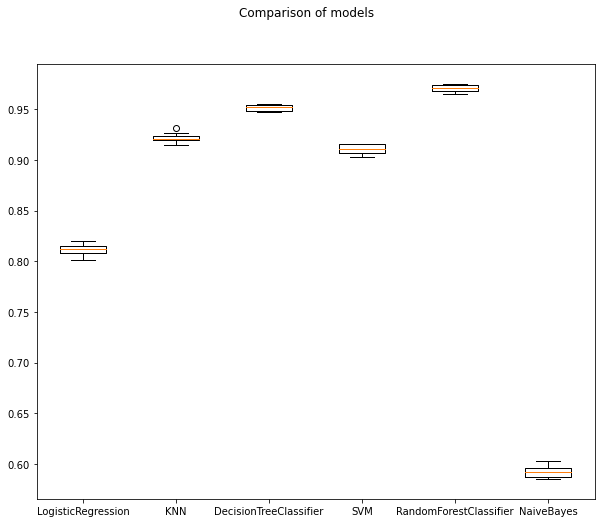

In [24]:
compareModels(accuracies, results, classifiers)

# Training, testing and visualising best three models

Accuracy = 96.77
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1551
           1       0.97      0.98      0.98      1583
           2       0.98      0.97      0.97      1287
           3       0.94      0.94      0.94      1618
           4       0.99      0.97      0.98      1301

    accuracy                           0.97      7340
   macro avg       0.97      0.97      0.97      7340
weighted avg       0.97      0.97      0.97      7340



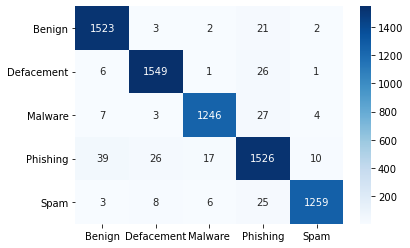

In [25]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
testModel(rf, X_test, y_test)

[0. 0. 1. 0. 0.]
RandomForestClassifier  : ROC AUC=99.65 %


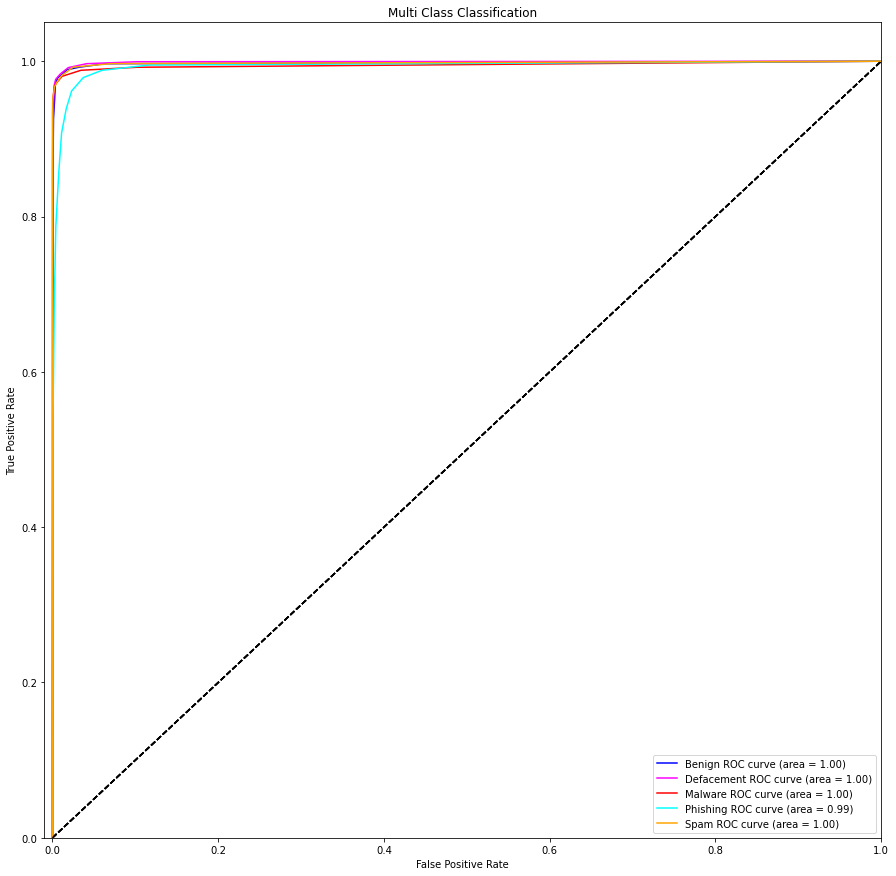

In [26]:
aucPlot(rf, X_test, y_test, 'RandomForestClassifier')

Accuracy = 95.67
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1551
           1       0.95      0.98      0.97      1583
           2       0.95      0.97      0.96      1287
           3       0.94      0.90      0.92      1618
           4       0.97      0.97      0.97      1301

    accuracy                           0.96      7340
   macro avg       0.96      0.96      0.96      7340
weighted avg       0.96      0.96      0.96      7340



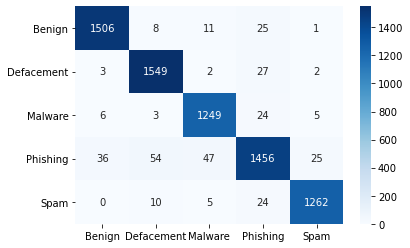

In [27]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
testModel(cart, X_test, y_test)

[0. 0. 1. 0. 0.]
DecisionTreeClassifier  : ROC AUC=97.35 %


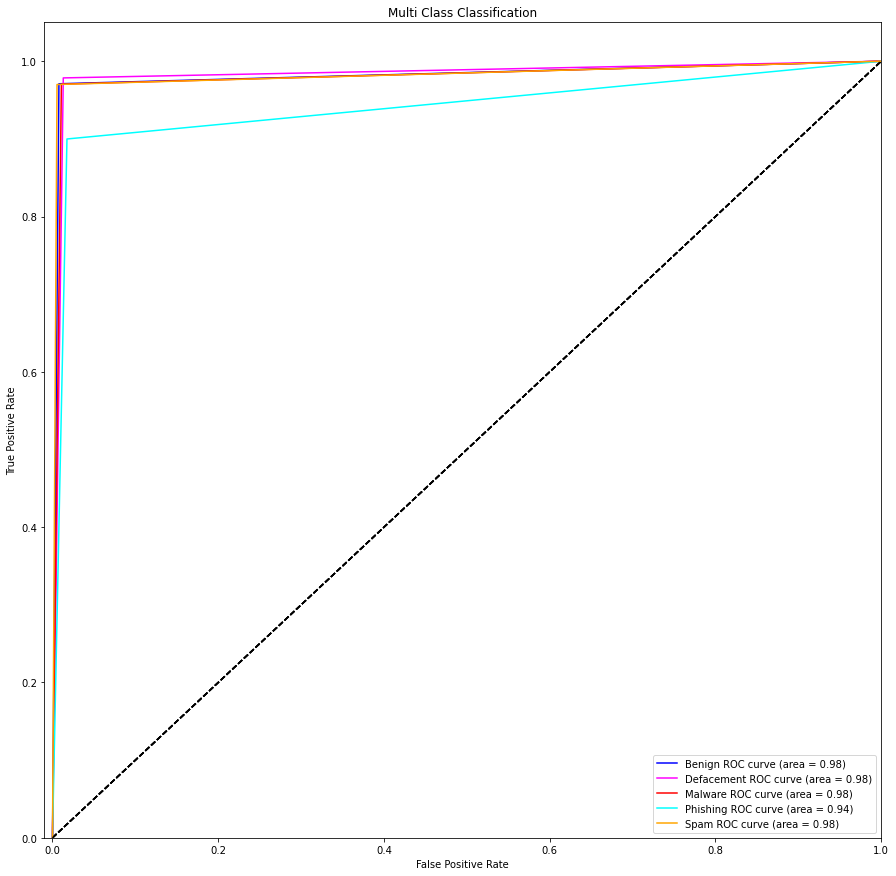

In [28]:
aucPlot(cart, X_test, y_test, 'DecisionTreeClassifier')

Accuracy = 91.87
Confusion Matrix:
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1551
           1       0.91      0.95      0.93      1583
           2       0.91      0.94      0.92      1287
           3       0.91      0.86      0.88      1618
           4       0.94      0.92      0.93      1301

    accuracy                           0.92      7340
   macro avg       0.92      0.92      0.92      7340
weighted avg       0.92      0.92      0.92      7340



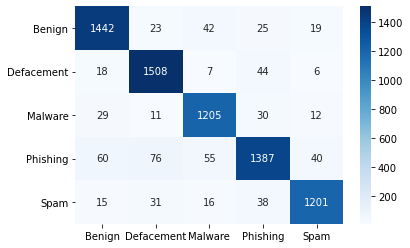

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
testModel(knn, X_test, y_test)

[0. 0. 1. 0. 0.]
KNeighborsClassifier  : ROC AUC=98.27 %


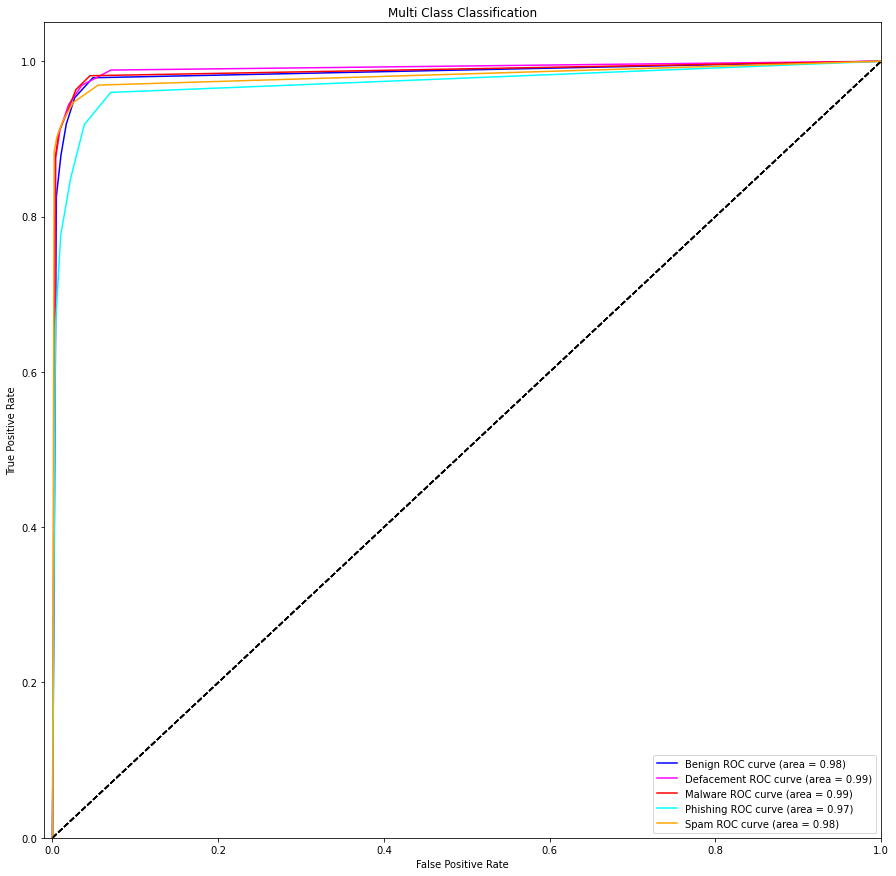

In [30]:
aucPlot(knn, X_test, y_test, 'KNeighborsClassifier')